In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [37]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [39]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


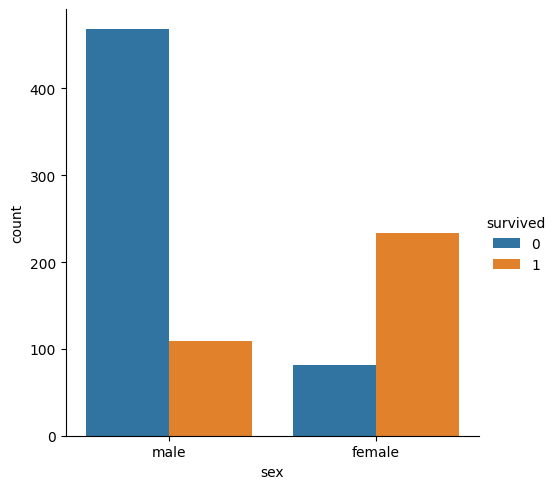

In [41]:
##countplot
sns.catplot(x="sex",data=df,kind="count",hue="survived")

In [42]:
df.shape

(891, 15)

##Data cleaning

In [43]:
##fill the column age with mean value
df["age"] = df["age"].fillna(df["age"].mean())

##fill the column embarked with mean value
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

##fill the column deck with mean value
df["deck"] = df["deck"].fillna(df["deck"].mode()[0])

##fill the column embark_town with mean value
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [44]:
df.shape

(891, 15)

In [45]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: xlabel='age'>

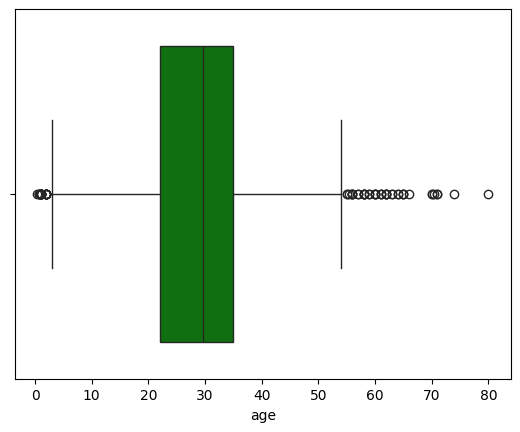

In [49]:
sns.boxplot(x="age",data=df,color="green")

##Feature Engineering

In [56]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df["sex"] = label.fit_transform(df["sex"])

df["class"] = label.fit_transform(df["class"])

df["embarked"] = label.fit_transform(df["embarked"])

In [57]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,man,True,C,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,0,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,2,woman,False,C,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,0,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,2,man,True,C,Southampton,no,True


In [52]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [55]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [58]:
for col in ["who","adult_male","deck","embark_town","alive","alone"]:
    df[col] = label.fit_transform(df[col])

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,1


In [60]:
##define features and target variable
X = df.drop(columns=["survived"])
y = df["survived"]

In [61]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,3,0,26.000000,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.000000,0,0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1,1,2,2,0,1
887,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,3,0,29.699118,1,2,23.4500,2,2,2,0,2,2,0,0
889,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


In [62]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [63]:
##train and test the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [66]:
X_train, X_test

(     pclass  sex        age  sibsp  parch      fare  embarked  class  who  \
 331       1    1  45.500000      0      0   28.5000         2      0    1   
 733       2    1  23.000000      0      0   13.0000         2      1    1   
 382       3    1  32.000000      0      0    7.9250         2      2    1   
 704       3    1  26.000000      1      0    7.8542         2      2    1   
 813       3    0   6.000000      4      2   31.2750         2      2    0   
 ..      ...  ...        ...    ...    ...       ...       ...    ...  ...   
 106       3    0  21.000000      0      0    7.6500         2      2    2   
 270       1    1  29.699118      0      0   31.0000         2      0    1   
 860       3    1  41.000000      2      0   14.1083         2      2    1   
 435       1    0  14.000000      1      2  120.0000         2      0    0   
 102       1    1  21.000000      0      1   77.2875         2      0    1   
 
      adult_male  deck  embark_town  alive  alone  
 331      

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)

In [80]:
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [81]:
y_pred = knn.predict(X_test)

In [87]:
print("Accuracy of the model:",accuracy_score(y_test,y_pred)*100)

Accuracy of the model: 78.2122905027933
